# Data Mining & Machine Learning


## Predicting the Survival of Titanic Passengers

## Algorithms in use:

  * Random Forest
  * Decision Tree
  * Knn



# Load Data

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic_raw.csv')

# titanic.shape
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have 891 examples and 12 columns

<br>
<hr class="dotted">
<br>

# Data Cleaning

In [4]:
titanic = titanic.rename(columns=str.lower) 
titanic.survived = (titanic.survived=='Yes').astype('int') 
titanic = titanic.drop(['ticket','name'], axis=1) 
titanic['has_cabin'] = (titanic.cabin.isna()==False).astype(int) 
titanic = titanic.drop(['cabin'], axis=1) 
titanic = pd.get_dummies(titanic) 
titanic.age = titanic.age.fillna(titanic.age.median()) 
titanic

,passengerid,survived,pclass,age,sibsp,parch,fare,has_cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,1,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,0,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [5]:
titanic = titanic.astype(float)

<br>
<hr class="dotted">
<br>

# Check

In [6]:
titanic.isna().sum()

passengerid    0
survived       0
pclass         0
age            0
sibsp          0
parch          0
fare           0
has_cabin      0
sex_female     0
sex_male       0
embarked_C     0
embarked_Q     0
embarked_S     0
dtype: int64

In [7]:
titanic.dtypes

passengerid    float64
survived       float64
pclass         float64
age            float64
sibsp          float64
parch          float64
fare           float64
has_cabin      float64
sex_female     float64
sex_male       float64
embarked_C     float64
embarked_Q     float64
embarked_S     float64
dtype: object

<br>
<hr class="dotted">
<br>

In [36]:
titanic

,passengerid,survived,pclass,age,sibsp,parch,fare,has_cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,1.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,13.0000,0.0,0.0,1.0,0.0,0.0,1.0
887,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,1.0,1.0,0.0,0.0,0.0,1.0
888,889.0,0.0,3.0,28.0,1.0,2.0,23.4500,0.0,1.0,0.0,0.0,0.0,1.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,1.0,1.0,0.0,0.0


In [13]:
from sklearn.model_selection import train_test_split
test_size = 200
train, test = train_test_split(titanic, test_size=test_size, random_state=0, shuffle=True)

label = 'survived'
psn = 'passengerid' ### New

x_train = train.drop(label, axis=1)
x_train = x_train.drop(psn, axis=1) ### New
y_train = train[label]
psn_train = train[psn] ### New

x_test = test.drop(label, axis=1)
x_test = x_test.drop(psn, axis=1) ### New
y_test = test[label]
psn_test = test[psn] ### New

In [14]:
train

,passengerid,survived,pclass,age,sibsp,parch,fare,has_cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
204,205.0,1.0,3.0,18.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
240,241.0,0.0,3.0,28.0,1.0,0.0,14.4542,0.0,1.0,0.0,1.0,0.0,0.0
672,673.0,0.0,2.0,70.0,0.0,0.0,10.5000,0.0,0.0,1.0,0.0,0.0,1.0
39,40.0,1.0,3.0,14.0,1.0,0.0,11.2417,0.0,1.0,0.0,1.0,0.0,0.0
283,284.0,1.0,3.0,19.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836.0,1.0,1.0,39.0,1.0,1.0,83.1583,1.0,1.0,0.0,1.0,0.0,0.0
192,193.0,1.0,3.0,19.0,1.0,0.0,7.8542,0.0,1.0,0.0,0.0,0.0,1.0
629,630.0,0.0,3.0,28.0,0.0,0.0,7.7333,0.0,0.0,1.0,0.0,1.0,0.0
559,560.0,1.0,3.0,36.0,1.0,0.0,17.4000,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
test

,passengerid,survived,pclass,age,sibsp,parch,fare,has_cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
495,496.0,0.0,3.0,28.0,0.0,0.0,14.4583,0.0,0.0,1.0,1.0,0.0,0.0
648,649.0,0.0,3.0,28.0,0.0,0.0,7.5500,0.0,0.0,1.0,0.0,0.0,1.0
278,279.0,0.0,3.0,7.0,4.0,1.0,29.1250,0.0,0.0,1.0,0.0,1.0,0.0
31,32.0,1.0,1.0,28.0,1.0,0.0,146.5208,1.0,1.0,0.0,1.0,0.0,0.0
255,256.0,1.0,3.0,29.0,0.0,2.0,15.2458,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,55.0,0.0,1.0,65.0,0.0,1.0,61.9792,1.0,0.0,1.0,1.0,0.0,0.0
45,46.0,0.0,3.0,28.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
172,173.0,1.0,3.0,1.0,1.0,1.0,11.1333,0.0,1.0,0.0,0.0,0.0,1.0
447,448.0,1.0,1.0,34.0,0.0,0.0,26.5500,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
x_train.shape, y_train.shape, psn_train.shape, x_test.shape, y_test.shape, psn_test.shape

((691, 11), (691,), (691,), (200, 11), (200,), (200,))

In [17]:
x_train

,pclass,age,sibsp,parch,fare,has_cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
204,3.0,18.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
240,3.0,28.0,1.0,0.0,14.4542,0.0,1.0,0.0,1.0,0.0,0.0
672,2.0,70.0,0.0,0.0,10.5000,0.0,0.0,1.0,0.0,0.0,1.0
39,3.0,14.0,1.0,0.0,11.2417,0.0,1.0,0.0,1.0,0.0,0.0
283,3.0,19.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
835,1.0,39.0,1.0,1.0,83.1583,1.0,1.0,0.0,1.0,0.0,0.0
192,3.0,19.0,1.0,0.0,7.8542,0.0,1.0,0.0,0.0,0.0,1.0
629,3.0,28.0,0.0,0.0,7.7333,0.0,0.0,1.0,0.0,1.0,0.0
559,3.0,36.0,1.0,0.0,17.4000,0.0,1.0,0.0,0.0,0.0,1.0


In [18]:
y_train

204    1.0
240    0.0
672    0.0
39     1.0
283    1.0
      ... 
835    1.0
192    1.0
629    0.0
559    1.0
684    0.0
Name: survived, Length: 691, dtype: float64

In [19]:
psn_train ### New

204    205.0
240    241.0
672    673.0
39      40.0
283    284.0
       ...  
835    836.0
192    193.0
629    630.0
559    560.0
684    685.0
Name: passengerid, Length: 691, dtype: float64

In [20]:
x_test

,pclass,age,sibsp,parch,fare,has_cabin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
495,3.0,28.0,0.0,0.0,14.4583,0.0,0.0,1.0,1.0,0.0,0.0
648,3.0,28.0,0.0,0.0,7.5500,0.0,0.0,1.0,0.0,0.0,1.0
278,3.0,7.0,4.0,1.0,29.1250,0.0,0.0,1.0,0.0,1.0,0.0
31,1.0,28.0,1.0,0.0,146.5208,1.0,1.0,0.0,1.0,0.0,0.0
255,3.0,29.0,0.0,2.0,15.2458,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
54,1.0,65.0,0.0,1.0,61.9792,1.0,0.0,1.0,1.0,0.0,0.0
45,3.0,28.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
172,3.0,1.0,1.0,1.0,11.1333,0.0,1.0,0.0,0.0,0.0,1.0
447,1.0,34.0,0.0,0.0,26.5500,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
y_test

495    0.0
648    0.0
278    0.0
31     1.0
255    1.0
      ... 
54     0.0
45     0.0
172    1.0
447    1.0
597    0.0
Name: survived, Length: 200, dtype: float64

In [22]:
psn_test

495    496.0
648    649.0
278    279.0
31      32.0
255    256.0
       ...  
54      55.0
45      46.0
172    173.0
447    448.0
597    598.0
Name: passengerid, Length: 200, dtype: float64

<br>
<hr class="dotted">
<br>

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

clf = DecisionTreeClassifier(max_depth=3)

clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'passengerid': psn_test, 'survived_what_actualy_happened':y_test, 'survived_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output.to_csv('my_DecisionTree_Prediction.csv', index=False) # saving results to csv

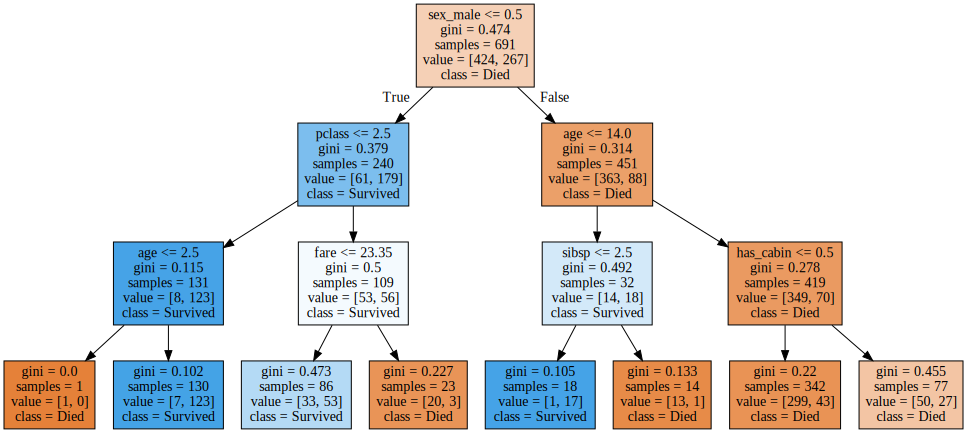

In [24]:
# Plotting the decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf, x_train.columns, ['Died', 'Survived'])


<br>
<hr class="dotted">
<br>

# Random Forest model

In [25]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)

model.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_RandomForest = model.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'passengerid': psn_test, 'survived_what_actualy_happened':y_test, 'survived_predicted_by_model': y_test_pred_RandomForest}) # saving results to DataFrame
output.to_csv('my_RandomForest_Prediction.csv', index=False) # saving results to csv


# Random Forest Feature Importance

In [26]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances # Every feature importance (%)

array([0.09446279, 0.05974103, 0.03766273, 0.01125875, 0.0879998 ,
       0.07290721, 0.32772471, 0.28167349, 0.01020661, 0.00663815,
       0.00972473])

In [27]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # Sorting the data frame

,feature,importance
6,sex_female,0.327725
7,sex_male,0.281673
0,pclass,0.094463
4,fare,0.088000
5,has_cabin,0.072907
1,age,0.059741
2,sibsp,0.037663
3,parch,0.011259
8,embarked_C,0.010207
10,embarked_S,0.009725


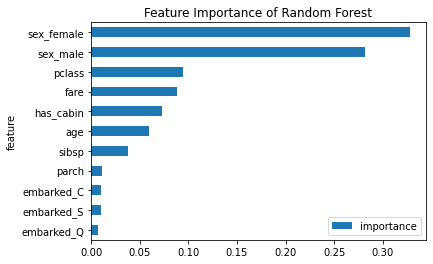

In [28]:
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh')
plt.title('Feature Importance of Random Forest');

<br>
<hr class="dotted">
<br>

# KNN - K Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm

clf = KNeighborsClassifier(n_neighbors=3)
        
clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_Knn = clf.predict(x_test) # making a prediction based on "test" data features

output = pd.DataFrame({'passengerid': psn_test, 'survived_what_actualy_happened':y_test, 'survived_predicted_by_model': y_test_pred_Knn}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction.csv', index=False) # saving results to csv



<br>
<hr class="dotted">
<br>

In [30]:
from sklearn.metrics import accuracy_score # importing "accuracy_score" from "sklearn.metrics"

In [31]:
# Evaluation for Decision Tree
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.825

In [32]:
# Evaluation for Random Forest
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.815

In [33]:
# Evaluation for Knn
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.73

<br>
<hr class="dotted">
<br>

In [34]:
# Decision Tree -- max_depth = 3 (like before)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.825

In [35]:
# Decision Tree -- max_depth = 5

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.82

In [53]:
# Decision Tree -- max_depth = 2

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.79

In [54]:
# Decision Tree -- max_depth = 99

clf = DecisionTreeClassifier(max_depth=99)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.795

## max_depth=3 --> looks like the best predictor

<br>
<hr class="dotted">
<br>

## Scaling

In [73]:
from sklearn.preprocessing import StandardScaler # import the libraries

scaler = StandardScaler() # define

x_train_scaled = scaler.fit_transform(x_train) # Fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # Perform standardization by centering and scaling

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)


output = pd.DataFrame({'passengerid': psn_test, 'survived_what_actualy_happened':y_test, 'survived_predicted_by_model': y_test_pred_Knn, 'survived_predicted_by_model_scaled':y_test_pred_Knn_Scaled}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction_scaled.csv', index=False) # saving results to csv


test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc

0.815

<br>
<hr class="dotted">
<br>

<br>


### Benchmark
<br>

In [74]:
y_train.value_counts()

0.0    424
1.0    267
Name: survived, dtype: int64

<br>

In [36]:
import numpy as np

def get_benchmark_predictions(x, benchmark_value): 
    return np.ones(len(x))*benchmark_value
    

benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark
# Basicly, our benchmark predicts, always 0 (zero) --> Not Survived

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<br>

In [37]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc


0.625

### Our model results:
Decision tree best accuracy Result: 82.5%<br>
Random Forest best accuracy Result: 84%<br>
Knn best accuracy Result (before standardization): 78.5%<br>
Knn best accuracy Result (after standardization): 81.5%<br>
## The performance on test is 62.5%

<br>
<br>
<hr class="dotted">
<br>
<br>